<h2>Case 1. Heart Disease Classification (binary)</h2>
<h3>Author: Amir Ingher and Joona Ikonen</h3>
<br>
<p>3.2.2019</p>
<br>
<p>Code that was used in this case  <a href="https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week_2_Case_1_(drafty_notes).ipynb">(link)</a></p>
<br>
<p>Organization: Metropolia University of Applied Sciences</p>

In [1]:


import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from random import randint

from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


<h3>Fetch the data</h3>

In [78]:
# Import data
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
dataframe = pd.read_csv(url, 
                        sep = ',', 
                        header = None, 
                        index_col = None,
                        na_values = '?')
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<h3>Lets transform our classified data to binary data </h3>

(303, 13) (303,)


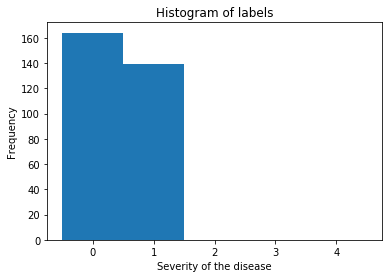

In [83]:





# Data column names
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal','num']
dataframe.columns = name_list

# Filling missing data with columnwise median values
dataframe = dataframe.fillna(dataframe.median())

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Randomize rows
dataframe = shuffle(dataframe)

# Select the data (input) columns
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal']
data = dataframe[data_list]

# Normalize data
data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)

# Select labels (output)
labels = dataframe['num']

# Convert the labels as binary
labels = 1.0*(labels > 0.0)

# Check the shapes of the normalized data and categorical output
print(data_norm.shape, labels.shape)

# Plot the histogram (if True)
if True:
  # histogram of the labels (severity of the disease)
  plt.hist(labels, bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
  plt.xlabel('Severity of the disease')
  plt.ylabel('Frequency')
  plt.title('Histogram of labels')
  plt.show()


<h2> First Solution </h2>

In [82]:
# Define the model. We are using pickBestModel() in this case
def baseline():
  model = models.Sequential()
  model.add(layers.Dense(15, activation='relu', input_shape=(13,)))
  model.add(layers.Dropout(0.2))  
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dropout(0.1))    
  model.add(layers.Dense(1, activation='sigmoid'))
  
  
    
  model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

In [6]:
def fitmodel():

    train_data = data_norm[:200]
    val_data = data_norm[200:]

    train_labels = labels[:200]
    val_labels = labels[200:]

    # Fit the model with the data and keep record on elapsed time
    newmodel= baseline()
    t_start = time.time()
    history = newmodel.fit(train_data, train_labels, 
                    epochs = 50, 
                    batch_size = 10, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
    t_end = time.time()
    print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

    return history

In [32]:
##Here we can create the logics for comparing and choosing the best model
def evaluateModels(a_model,b_model):
    
    a_history_dict = a_model.history
    b_history_dict = b_model.history

    ##loss_values = history_dict['loss']
    ##val_loss_values = history_dict['val_loss']
    ##acc_values = history_dict['acc']
    ##val_acc_values = history_dict['val_acc']
    ##epochs = range(1, len(loss_values) + 1)
    
    if a_history_dict['loss'] < b_history_dict['loss']:
        return a_model
    else:
        return b_model
    
    

In [22]:
##get (x amount neurons ) layer
def getLayer(rand):
    
    return layers.Dense(rand, activation='relu')


In [21]:
##get drop out layers
def getDropout(rand):
    
    return layers.Dropout(rand/100)

In [67]:
##here we create random x amount of layers 
def createModel(amount_layers,input_num):
    
    model = models.Sequential()
    model.add(layers.Dense(15, activation='relu', input_shape=(input_num,)))
    
    for num in range(amount_layers):
        model.add(getLayer(randint(4,14)))
        model.add(getDropout(randint(0,4)))
        
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
    return model

In [68]:
##here we fit the models
def fitmodels(e,b,v,model):
    
    train_data = data_norm[:200]
    val_data = data_norm[200:]

    train_labels = labels[:200]
    val_labels = labels[200:]

    # Fit the model with the data and keep record on elapsed time
    newmodel= model
    t_start = time.time()
    history = newmodel.fit(train_data, train_labels, 
                    epochs = e, 
                    batch_size = b, 
                    verbose = v,
                    validation_data = (val_data, val_labels))
    t_end = time.time()

    return history  

In [69]:
##here we generate x*y amount of models and then choose the best one
def pickBestModel(xx,yy):
    
    model = createModel(3,13)
    history = fitmodels(40,10,0,model)
    bestModel = history;
    
    for x in range(xx):
        epochs = randint(20,50)
        bSize = randint(10,30)
        print(x)
        t_start = time.time()  
        
        for y in range(yy):
            model = createModel(randint(1,5),13)
            history = fitmodels(epochs,bSize,0,model)
            bestModel = evaluateModels(bestModel,history)
         
        t_end = time.time()
        print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))
 
    
    return bestModel

<h3>Start the automated training</h3>

In [74]:
# Get the training data
his = pickBestModel(5,3)
history_dict = his.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

print("Training: ")
print("loss: ",history_dict['loss'][-1])
print("acc: ",history_dict['acc'][-1],"\n")
print("Validation: ")
print("loss: ",history_dict['val_loss'][-1])
print("acc: ",history_dict['val_acc'][-1],"\n")

0
Elapsed time: 96.54 seconds
1
Elapsed time: 91.95 seconds
2
Elapsed time: 107.17 seconds
3
Elapsed time: 99.12 seconds
4
Elapsed time: 97.46 seconds
Training: 
loss:  0.36119864992797374
acc:  0.8500000002980233 

Validation: 
loss:  0.36847053338023067
acc:  0.8446602051697888 



<h3>Lets Create Graphs</h3>

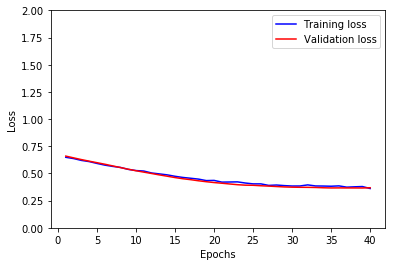

Training: 
loss:  0.36119864992797374
Validation: 
loss:  0.36847053338023067


In [75]:
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()
print("Training: ")
print("loss: ",history_dict['loss'][-1])
print("Validation: ")
print("loss: ",history_dict['val_loss'][-1])

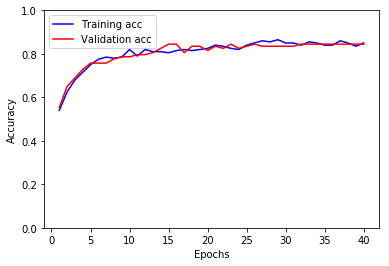

Training: 
acc:  0.8500000002980233
Validation: 
acc:  0.8446602051697888


In [85]:
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()
print("Training: ")
print("acc: ",history_dict['acc'][-1])
print("Validation: ")
print("acc: ",history_dict['val_acc'][-1])

<h2>Secound Solution </h2>

<h3>Lets create another model and validate it with cross validation</h3>

In [50]:
def getEstimator():
    
    return KerasClassifier(build_fn=baseline, epochs=50, batch_size=30, verbose=0)

In [51]:
def getKFolder():
    
    return StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [52]:
# Evaluate the model

def cross_v_score():
    t_start = time.time()

    results = cross_val_score(getEstimator(),data, labels, cv=getKFolder())
    t_end = time.time()

    print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

    np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

    print('Results: ',results*100, "%")
    return results



In [53]:
# Try another cross validator
def cross_validation():
    t_start = time.time()
    cv_results = cross_validate(getEstimator(), data, labels, cv=10,
                           return_train_score=True)
    sorted(cv_results.keys())                         
    t_end = time.time()
    print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))
    return cv_results

In [54]:
# Print the results (second time)
results = cross_v_score()
print('Results', results*100, "%")
print("Average (std): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Elapsed time: 24.11 seconds
Results:  [ 63.93  72.13  54.10  67.21  54.24] %
Results [ 63.93  72.13  54.10  67.21  54.24] %
Average (std): 62.32% (7.15%)


In [56]:
results = cross_validation()
print('Test score:', results['test_score'])
print("Average (std): %.2f%% (%.2f%%)" % (results['test_score'].mean()*100, results['test_score'].std()*100))
print()
print('Train score:', results['train_score'])
print("Average (std): %.2f%% (%.2f%%)" % (results['train_score'].mean()*100, results['train_score'].std()*100))

Elapsed time: 48.43 seconds
Test score: [ 0.55  0.42  0.48  0.57  0.37  0.63  0.47  0.63  0.73  0.70]
Average (std): 55.52% (11.49%)

Train score: [ 0.69  0.56  0.55  0.54  0.47  0.61  0.64  0.66  0.60  0.75]
Average (std): 60.65% (7.91%)
